<span style="font-size: 280%;color:#1155cc"> Parking Birmingham occupancy analysis 

<span style="font-size: 280%;color:#1155cc">- Model dla pojedynczego parkingu
    
<span style="font-size: 150%;color:WHITE; background:BLACK">WERSJA PODSTAWOWA</span>     

<span style="font-size: 110%;color:#1155cc">Source of data: https://archive.ics.uci.edu/ml/datasets/Parking+Birmingham
    
    

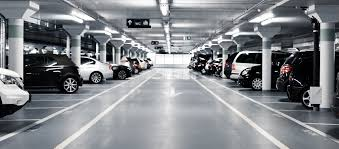

In [16]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [17]:
import numpy as np
import statistics as stat
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from scipy import stats
from numpy import median

ModuleNotFoundError: No module named 'matplotlib'

<IPython.core.display.Javascript object>

In [ ]:
df = pd.read_csv('/media/wojciech/D6DE33C1DE339927/1A/ParkingBirmingham.csv')

def green(text):
     print('\033[32m', text, '\033[0m', sep='') 

green(df.dtypes)
print()
print()
print(df.shape)

df.head(4)

# Spis zmiennych:

- <span style="font-size: 130%;color:#1155cc"> SystemCodeNumber: </span>indeks rekordu
- <span style="font-size: 130%;color:#1155cc">LastUpdated:</span> data i godzina
- <span style="font-size: 130%;color:#1155cc">Capacity:</span> potencjalna ilość miejsc 
- <span style="font-size: 130%;color:#1155cc">Occupancy:</span> zajęta ilość miejsc


<span style="font-size: 110%;color:#1155cc"> Wycinanie zakresu do badań
    
<span style="font-size: 110%;color:red"> BEZ ZMIAN   

In [ ]:
df2 = df.sample(frac = 1.00, random_state=148)
df2.shape

<span style="font-size: 110%;color:#1155cc"> Sprawdzam czy są braki w danych.
        
<span style="font-size: 110%;color:red"> BRAK DZIUR   

In [ ]:
df.isnull().sum()

In [2]:
a,b = df.shape     #<- ile mamy kolumn
b

print('NUMBER OF EMPTY RECORDS vs. FULL RECORDS')
print('----------------------------------------')
for i in range(1,b):
    i = df.columns[i]
    r = df[i].isnull().sum()
    h = df[i].count()
    pr = (r/h)*100
   
    if r > 0:
        print(i,"--------",r,"--------",h,"--------",pr) 

NameError: name 'df' is not defined

<span style="font-size: 110%;color:#1155cc">Dane nie mają braków. Szukam czy nie ma błędów. Zmienne nie mają błędów.

In [ ]:
df.agg(['min', 'max', 'mean', 'median'])

<span style="font-size: 110%;color:#1155cc">Nie może być ujemna liczba zajętych miejsc, tworzymy zero gdy wartość jest ujemna
    

In [ ]:
df['Occupancy'] = df['Occupancy'].apply(lambda x: 0 if x < 0 else x)

In [ ]:
df.Occupancy.min()

<span style="font-size: 110%;color:#1155cc">Jak dużo jest analizowanych parkingów i ile mają miejsc?

In [ ]:
df.pivot_table(index='SystemCodeNumber',  values='Capacity',aggfunc=['mean','max', 'min']).reset_index()

<span style="font-size: 180%;color:#1155cc"> Rozbieramy datę na szczegóły

<span style="font-size: 110%;color:#1155cc">Ze zmiennych opisujących mamy jedynie datę i godzinę więc wyciskamy z tej zmiennej ile tylko się da.

In [ ]:
df.dtypes

<span style="font-size: 110%;color:#1155cc">Przyjmujemy format daty.

In [ ]:
df['LastUpdated'] = pd.to_datetime(df.LastUpdated)

In [ ]:
df.dtypes

In [ ]:
df.head(3)

In [ ]:
df['year'] = df['LastUpdated'].dt.year
df['year'].unique()

In [ ]:
df['hour'] = df['LastUpdated'].dt.hour
df['hour'].unique()

In [ ]:
df['month'] = df['LastUpdated'].dt.month
df['month'].unique()

In [ ]:
df['week'] = df['LastUpdated'].dt.week
df['week'].unique()

In [ ]:
df['week_day'] = df['LastUpdated'].dt.weekday
df['week_day'].unique()

In [ ]:
df['week_day_name'] = df['LastUpdated'].dt.weekday_name
df['week_day_name'].unique()

In [ ]:
df['day'] = df['LastUpdated'].dt.day
df['day'].unique()

In [ ]:
Ewa = ['rano', 'południe','po południu','wieczór']

df['period'] = pd.qcut(df['hour'],4, labels=Ewa)

In [ ]:
df['period'].unique()

In [3]:
pd.pivot_table(df, index= ['hour','period'], values= "Occupancy", aggfunc= 'count')

NameError: name 'pd' is not defined

In [ ]:
df.head(4)

<span style="font-size: 110%;color:#1155cc"> Usuwamy: "week_day"
    bo to to samo co: "week_day_name"

In [ ]:
del df['week_day']

<span style="font-size: 110%;color:#1155cc"> Wycinamy miesiące do nauki modelu i miesiące do sprawdzenia modelu.

In [ ]:
df.month.value_counts()

<span style="font-size: 180%;color:#1155cc"> Zmiana formatu zmiennych niezależnych</span> 

Które z tych funkcji są kategoryczne?

Stawiam dwa warunki: 

1. funkcja jest kategoryczna bo ma format 'object'
2. funkcja jest kategoryczna bo ma do 24 unikalnych wartości

In [ ]:
a,b = df.shape     #<- ile mamy kolumn
b

print('ONLY DISCRETE FUNCTION')
print('----------------------')
for i in range(1,b):
    i = df.columns[i]
    f = df[i].dtypes
    h = df[i].nunique()
    
    if f == np.object or h<=24:
        print(i,"---",f,"---",h)

<span style="font-size: 110%;color:#1155cc">Sprawdzamy format danych 

In [ ]:
green(df.dtypes)

<span style="font-size: 110%;color:#1155cc">Zmienne dyskretne mają format 'int64' a powinny mieć 'category'.

In [ ]:
df.loc[:, 'year':'week_day_name'] =  df.loc[:, 'year':'week_day_name'].astype('category')

In [ ]:
df.dtypes

<span style="font-size: 150%;color:WHITE; background:#1155Cc">WYDZIELENIE ZBIORU</span>

<span style="font-size: 170%;color:#1155cc">MIESIĄCE

<span style="font-size: 110%;color:#1155cc"> Przyjmujemy, że pierwsze dwa miesiące: 11,12 służą do nauki modelu a miesiąc 12 do sprawdzenia modelu

In [ ]:
df6 = df[(df['month']==10)|(df['month']==11)]

In [ ]:
df6.head(2)

<span style="font-size: 110%;color:#1155cc"> Widać, że mamy kilkanascie parkingów, informacja o ilości potencjalnych miejsc parkingowych jest skorelowana z ilością zajentych miejsc musimy analizować każdy parking oddzielnie </span>

<span style="font-size: 170%;color:#1155cc">Wybieramy parking 'Shopping'

In [ ]:
df6 = df6[df6['SystemCodeNumber']=='Shopping']

<span style="font-size: 110%;color:#1155cc"> Tworzę zdublowaną zmienną 'windspeed_shift' z uwzględnieniem przesunięcia 13 godzinnego.

<span style="font-size: 180%;color:#1155cc"> Przegląd wartości unikalnych dla zmiennych dyskretnych

In [4]:
a,b = df6.shape     #<- ile mamy kolumn
b

import numpy as np

for i in range(1,b):
    i = df6.columns[i]
    h = df6[i].nunique()
    f = df6[i].dtypes
          
    print(f,'---nunique->',h,'---name->', i)

NameError: name 'df6' is not defined

In [ ]:
a,b = df6.shape     #<- ile mamy kolumn
b

print('ONLY DISCRETE FUNCTION')
print('----------------------')
for i in range(1,b):
    i = df6.columns[i]
    f = df6[i].dtypes
    h = df6[i].nunique()
    
    if f == np.object or h<=10:
        print(i,"---",f,"---",h)

<span style="font-size: 150%;color:WHITE; background:#1155Cc">DO KODOWANIE NA GORĄCO DAJEMY TE ZMIENNE, KTÓRE BĘDZIEMY MIELI W NASTĘPNYCH MIESIĄCACH </span>  

Nic nie zyskamy jak właczymy numer tygodnia: 'week' skoro w przyszłości będa inne numery miesiąca
Z czysto pragmatycznego podejścia wynika że 'year' też nic nie wnosi.

Do kodowania na gorąco bierzemy tylko te zmienne dyskretne, które możemy wykorzystać dla przyszłej prognozy. Nie bierzemy 'week' ponieważ pokrywa sie / koreluje się z dniem i miesiącem. wystarczy dzień tygodnia godzina i miesiąc. Takie praktyczne podejście.  




<span style="font-size: 150%;color:WHITE; background:#1155Cc">KODOWANIE NA GORĄCO</span>     


<span style="font-size: 110%;color:#1155cc">Wypisuje zmienne, które są dyskretne i które należy kodować na gorąco.

In [5]:
discrete_var = ['hour', 'month', 'period', 'week_day_name']

In [6]:
df6.columns

NameError: name 'df6' is not defined

In [ ]:
df6.tail(3)

In [ ]:
data_dummy = df6

def dummify_dataset(df6, col):
    dummy_column = pd.get_dummies(df6[col], prefix = col, drop_first = True)
    PKP = pd.concat([df6,dummy_column],axis = 1)
    PKP = PKP.drop([col], axis=1)
    return PKP


discrete_var = ['hour', 'day', 'month', 'period', 'week_day_name']

for i in range(0,5):
    data_dummy = dummify_dataset(data_dummy,discrete_var[i])

In [ ]:
df6.head(3)

In [ ]:
df7 = data_dummy 
df7.sample(3)

In [ ]:
df7.columns

 <span style="font-size: 110%;color:#1155cc"> wybieram odpowiednie kolumny do modelu

In [ ]:
df8 = df7[['Occupancy', 'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12', 'hour_13',
       'hour_14', 'hour_15', 'hour_16', 'day_2', 'day_3', 'day_4', 'day_5',
       'day_6', 'day_7', 'day_8', 'day_9', 'day_10', 'day_11', 'day_12',
       'day_13', 'day_14', 'day_15', 'day_16', 'day_17', 'day_18', 'day_19',
       'day_20', 'day_21', 'day_22', 'day_23', 'day_24', 'day_25', 'day_26',
       'day_27', 'day_28', 'day_29', 'day_30', 'day_31', 'month_11',
       'period_południe', 'period_po południu', 'period_wieczór',
       'week_day_name_Monday', 'week_day_name_Saturday',
       'week_day_name_Sunday', 'week_day_name_Thursday',
       'week_day_name_Tuesday', 'week_day_name_Wednesday']]

In [7]:
df8.tail(3)

NameError: name 'df8' is not defined

 <span style="font-size: 110%;color:#1155cc"> Podział zbioru na testowy i treningowy.

In [ ]:
from sklearn.model_selection import train_test_split 

y = df8['Occupancy']
X = df8.drop('Occupancy', axis=1)

Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, test_size=0.25, random_state = 148)

<span style="font-size: 180%;color:#1155cc">Uruchamiam paczkę modeli regresji

<span style="font-size: 110%;color:#1155cc">Celem jest wybranie najlepszego modelu.

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, HuberRegressor, ElasticNetCV
from sklearn.ensemble import BaggingRegressor, ExtraTreesRegressor, GradientBoostingRegressor, RandomForestRegressor,AdaBoostRegressor
from sklearn.dummy import DummyRegressor
from sklearn.neighbors import KNeighborsRegressor


from sklearn import model_selection
from sklearn.metrics import mean_squared_log_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR


import warnings   
warnings.filterwarnings("ignore")

modele = [KNeighborsRegressor(),
          DecisionTreeRegressor(),
          BaggingRegressor(),
          GradientBoostingRegressor(),
          LinearRegression(),
          AdaBoostRegressor(),
          Ridge(),
          HuberRegressor(),
          ElasticNetCV(),
          ExtraTreesRegressor(),
          RandomForestRegressor(),
          SVR()
          ] 

nazwy = ['K-Neighbors Regressor',
          'Decision Tree Regressor',
          'Bagging Regressor',
          'Gradient Boosting Regressor',
          'Linear Regression',
          'AdaBoost Regressor',
          'Ridge',
          'Huber Regressor',
          'Elastic Net CV',
          'ExtraTreesRegressor',
          'Random Forest Regressor',
          'Support Vector Regression'
          ]

In [ ]:
def model_val(t):
    
    global mean_dev,r2
    
    kfold = model_selection.KFold(n_splits=9, random_state=148)
    mean_dev = model_selection.cross_val_score(t, Xtrain, ytrain, cv=kfold, scoring='neg_mean_absolute_error')
    mean_dev = np.round(mean_dev, decimals=1)
    r2 = model_selection.cross_val_score(t, Xtrain, ytrain, cv=kfold, scoring='r2')
    r2 = np.round(r2, decimals=2)
    
    return mean_dev,r2

In [ ]:
def green(text):
     print('\033[32m', text, '\033[0m', sep='')
        
def red(text):
     print('\033[31m', text, '\033[0m', sep='')        

In [8]:
for n,p in zip(nazwy,modele):      
    
    import matplotlib.pyplot as plt
    import time   
    
    start_time = time.time()
    
    results = model_val(p)
    print()
    red(n)
    print("-------------------------------cross_val, KFold = 9 ------")
    print('R2: ', r2)
    print('Mean_dev: ', mean_dev)
    
    # wykres
    
    plt.rc("font",size=14)
    clf = p
    clf.fit(Xtrain,ytrain)
    ypred = clf.predict(Xtest)

    ax = sns.regplot(ytest,ypred,color='grey')
    plt.title(n,color='r') 
    plt.ylabel('count', fontsize=12) 
    plt.xlabel('count', fontsize=12) 
    plt.show()
    
    # pomiar czasu
    n = (time.time() - start_time)
    n = np.round(n)
    print('time: %s seconds' % n)    
    print()

NameError: name 'nazwy' is not defined

<span style="font-size: 180%;color:#1155cc">Tuning modeli 
    
<span style="font-size: 110%;color:#1155cc">Analiza cross validation bez szczególnych ustawień hiperparametrów, na pełnym zestawie zmiennych niezależnych pokazała, że istnieją trzy najlepsze modele regresji:

        - Bagging Regressor
        
<span style="font-size: 110%;color:#1155cc">Teraz należy udoskonalić te modele poprzez dobór hiperparametrów. 

 <span style="font-size: 150%;color:white;background:#1155cc"> Optymalizacja 'Bagging Regressor'

In [ ]:
from sklearn.dummy import DummyRegressor
from sklearn.neighbors import KNeighborsRegressor
import time   
    
start_time = time.time()

# DummyRegressor(),DecisionTreeRegressor(),KNeighborsRegressor(),SVR(gamma='scale')

parameters={"base_estimator": [DecisionTreeRegressor(),KNeighborsRegressor()],
                          "max_samples": [0.5, 1.0],
                          "max_features": [0.5, 1.0],
                          "bootstrap": [True, False],
                          "bootstrap_features": [True, False]}

Bagging_Regressor = GridSearchCV(BaggingRegressor(), parameters,scoring = 'r2')
Bagging_Regressor.fit(Xtrain,ytrain)

print('BaggingRegressor:',Bagging_Regressor.best_score_)
print(Bagging_Regressor.best_params_)
print(Bagging_Regressor.best_estimator_)

    # wykres
    
plt.rc("font",size=14)
Bagging_Regressor.fit(Xtrain,ytrain)
ypred = Bagging_Regressor.predict(Xtest)

ax = sns.regplot(ytest,ypred,color='#45818e')
plt.title('Bagging Regressor:',color='#134f5c') 
plt.ylabel('count', fontsize=12) 
plt.xlabel('count', fontsize=12) 
plt.show()


# pomiar czasu
n = (time.time() - start_time)
n = np.round(n)
print('time: %s seconds' % n)    

<span style="font-size: 150%;color:white;background:#1155cc"> Optymalizacja 'Random Forest Regressor'

<span style="font-size: 150%;color:white;background:#1155cc"> Optymalizacja 'Extra Trees Regressor'

In [9]:
parameters={'n_estimators': [50,100,500],
               'min_samples_leaf': [1,5,10],
                'min_samples_split': [5,10,20]}

ExtraTreesRegressor = GridSearchCV(ExtraTreesRegressor(), parameters,scoring = 'r2')
ExtraTreesRegressor.fit(Xtrain,ytrain)

print('Extra Trees Regressor:',ExtraTreesRegressor.best_score_)
print(ExtraTreesRegressor.best_params_)
print(ExtraTreesRegressor.best_estimator_)

    # wykres
    
plt.rc("font",size=14)
ExtraTreesRegressor.fit(Xtrain,ytrain)
ypred = ExtraTreesRegressor.predict(Xtest)

ax = sns.regplot(ytest,ypred,color='#45818e')
plt.title('Extra Trees Regressor',color='#134f5c') 
plt.ylabel('count', fontsize=12) 
plt.xlabel('count', fontsize=12) 
plt.show()

# pomiar czasu
n = (time.time() - start_time)
n = np.round(n)
print('time: %s seconds' % n) 

NameError: name 'GridSearchCV' is not defined

 <span style="font-size: 150%;color:white;background:#674ea7"> SPRAWDZENIE JAK PROGNOZUJE MODEL
    
<span style="font-size: 110%;color:#1155cc">uruchamiamy teraz tą część Która miała służyć do sprawdzenia modelu: miesiąc 12    

<span style="font-size: 110%;color:#1155cc"> PRZYGOTOWANIE DANYCH DO UŻYCIA MODELI
    
<span style="font-size: 160%;color:#1155cc"> Miesiąc: 12    

In [ ]:
df9 = df[df['month']==12]
print(df9.shape)
df9.tail(3)

<span style="font-size: 160%;color:#1155cc"> Parking: 'Shopping' 

In [ ]:
df9 = df9[df9['SystemCodeNumber']=='Shopping']

In [10]:
df9=df9[df9['month']==12]
print(df9.shape)
df9.head(3)

NameError: name 'df9' is not defined

<span style="font-size: 150%;color:WHITE; background:#1155Cc">KODOWANIE NA GORĄCO</span>     

<span style="font-size: 110%;color:#1155cc">Wypisuje zmienne, które są dyskretne i które należy kodować na gorąco.

In [ ]:
discrete_var = ['hour', 'month', 'period', 'week_day_name']

In [ ]:
df9.columns

In [ ]:
print(df9.shape)
df9.tail(3)

In [ ]:
data_dummy = df9

def dummify_dataset(df6, col):
    dummy_column = pd.get_dummies(df6[col], prefix = col, drop_first = True)
    PKP = pd.concat([df6,dummy_column],axis = 1)
    PKP = PKP.drop([col], axis=1)
    return PKP


discrete_var = ['hour', 'day', 'month', 'period', 'week_day_name']

for i in range(0,5):
    data_dummy = dummify_dataset(data_dummy,discrete_var[i])

In [ ]:
df9.head(3)

In [11]:
df10 = data_dummy 
df10.sample(3)

NameError: name 'data_dummy' is not defined

In [ ]:
df10.columns

 <span style="font-size: 110%;color:#1155cc"> wybieram odpowiednie kolumny do modelu

In [ ]:
df11 = df10[['Occupancy', 'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12', 'hour_13',
       'hour_14', 'hour_15', 'hour_16', 'day_2', 'day_5', 'day_6', 'day_7',
       'day_8', 'day_9', 'day_10', 'day_11', 'day_12', 'day_13', 'day_14',
       'day_15', 'day_16', 'day_17', 'day_18', 'day_19', 'month_11',
       'month_12', 'period_południe', 'period_po południu', 'period_wieczór',
       'week_day_name_Monday', 'week_day_name_Saturday',
       'week_day_name_Sunday', 'week_day_name_Thursday',
       'week_day_name_Tuesday', 'week_day_name_Wednesday']]

In [ ]:
print(df11.shape)
df11.tail(3)

<span style="font-size: 110%;color:#1155cc">Dzielimy zbiór zmienne niezależne i zmieną zależną.

In [ ]:
y = df11['Occupancy']
X = df11.drop('Occupancy', axis=1)

<span style="font-size: 110%;color:#1155cc">Sprawdzam jak sobie poradzą 3 wybrane modele.

<span style="font-size: 160%;color:#1155cc">Bagging_Regressor
    
Wykorzystujemy gotowy model, który jest już wcześniej zoptymalizowany    

In [12]:
Bagging_Regressor = Bagging_Regressor.fit(X,y)
df11['Bagging_Reg'] = Bagging_Regressor.predict(X)

y_pred = Bagging_Regressor.predict(X)
print('Bagging_Reg r2:      %.2f' % r2_score(y, y_pred))

NameError: name 'Bagging_Regressor' is not defined

<span style="font-size: 160%;color:#1155cc">Extra Trees Regressor
    
Wykorzystujemy gotowy model, który jest już wcześniej zoptymalizowany        

In [ ]:
ExtraTreesRegressor = ExtraTreesRegressor.fit(X,y)
df11['ExtraTrees_Reg'] = ExtraTreesRegressor.predict(X)
df11['ExtraTrees_Reg'] = np.round(df11['ExtraTrees_Reg'], decimals=1)
y_pred = ExtraTreesRegressor.predict(X)
print('ExtraTrees_Reg r2:   %.2f' % r2_score(y, y_pred))

<span style="font-size: 150%;color:#1155cc">Tworzę komitet modeli w proporcji:
     
<div class="alert-info">

     60% ExtraTrees_Reg
     20% Bagging_Reg
     20% RandomForest_Reg
</div>

In [ ]:
df11['KM'] = (0.6*df11['Bagging_Reg'])+(0.4*df11['ExtraTrees_Reg'])

<span style="font-size: 110%;color:#1155cc"> Dodajemy zmienną 'dteday'

In [ ]:
df11['LastUpdated'] = df9['LastUpdated']

df11[['LastUpdated','Bagging_Reg','ExtraTrees_Reg','Occupancy']].sample(10)

<span style="font-size: 150%;color:#1155cc">Graficzny przebieg procesu

In [ ]:
df11.reset_index
df11.set_index('LastUpdated', inplace=True)
df11[['KM','Occupancy']].head(160).plot(figsize=(24,5))

<span style="font-size: 180%;color:#1155cc">Wizualizacja struktury

<span style="font-size: 110%;color:#1155cc"> DANE DYSKRETNE - WYŚWIETLAM ILOŚĆ DANYCH UNIKALNYCH W KAŻDEJ KATEGORII

In [13]:
dkk = dk[['season','yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']]
categorical_vars=['season','yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']

NameError: name 'dk' is not defined

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(12, 8))
# robie przestrzeń między wykresami 
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.8, hspace=0.3)
# pętla: mamy 9 zmiennych dyskretnych
for i, ax in enumerate(axes.ravel()):
    if i > 8:
        ax.set_visible(False)
        continue
    sns.countplot(y = categorical_vars[i], data=dkk, ax=ax)

<span style="font-size: 180%;color:#1155cc"> DANE CIĄGŁE

In [ ]:
sns.set(style="white")
_ = dk.hist(column=['windspeed' ,'hum','temp','cnt'], figsize = (8,8))

In [ ]:
def N_plots(df,x1,x2,by,title, x_title):

    plt.figure(dpi= 380)

    fig, axes = joypy.joyplot(df, column=[x1, x2], by=by, ylim='own', figsize=(12,8), legend=True, color=['#f4cccc', '#0c343d'], alpha=0.4)
    # color=['#76a5af', '#134f5c']
    # color=['#f4cccc', '#0c343d']
    # color=['#a4c2f4', '#1c4587']
    #color=['#e06666', '#d9d9d9']
    #color=['#e06666', '#434343']
    #color=['#b6d7a8','#6aa84f']
    
    # Decoration
    plt.title(title, fontsize=22, color='#d0e0e3', alpha=0.9)
    plt.rc("font", size=20)
    plt.xlabel(x_title,  fontsize=16, color='darkred', alpha=1)
    #plt.ylabel('Data Scientist', fontsize=26,  color='grey', alpha=0.8)

    plt.show

<span style="font-size: 180%;color:#1155cc">Ilość rowerów zależnie od temperatury i wilgotności w miesiącach

In [14]:
import joypy
import pandas as pd
import matplotlib.pyplot as plt

df=df
x1='temp'
x2='hum'
by='mnth'
title = 'Ilość rowerów zależnie od temperatury i wilgotności w miesiącach'
x_title = 'Temperatura i wilgotność'

N_plots(df,x1,x2,by,title, x_title)

ModuleNotFoundError: No module named 'joypy'

<span style="font-size: 180%;color:#1155cc">Częstotliwość wypożyczania rowerów w roku 2011

In [ ]:
import matplotlib as mpl
import calmap
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/home/wojciech/Pulpit/11/hour.csv', parse_dates=['dteday'])
df.set_index('dteday', inplace=True)

In [ ]:
plt.figure(figsize=(16,10), dpi= 280)
calmap.calendarplot(df['2011']['cnt'],cmap= 'YlOrBr', fig_kws={'figsize': (16,10)}, yearlabel_kws={'color':'black', 'fontsize':24}, subplot_kws={'title':'Częstotliwość wypożyczania rowerów w roku 2011'})
plt.show()

<span style="font-size: 180%;color:#1155cc">Wypożyczanie rowerów w godzinach zależnie od sezonu

In [ ]:
fig,ax = plt.subplots(figsize = (18,6))
sns.pointplot(data=df[['hr',
                           'cnt',
                           'season']],
              x='hr',
              y='cnt',
              hue='season',
              ax=ax)
ax.set(title="Wypożyczanie rowerów w godzinach zależnie od sezonu")

In [ ]:
df.columns

<span style="font-size: 180%;color:#1155cc">Wypożyczanie rowerów zależnie od miesiąca

In [15]:
fig,ax = plt.subplots(figsize = (18,6))
sns.barplot(data=df[['mnth',
                           'cnt']],
              x='mnth',
              y='cnt',
              ax=ax)
ax.set(title="Miesięczny poziom wypożyczeń")

NameError: name 'plt' is not defined

<span style="font-size: 180%;color:#1155cc">Wypożyczanie rowerów zależnie od godzin

In [ ]:
fig,ax = plt.subplots(figsize = (18,6))
sns.boxplot(data=df[['cnt',
                          'hr']],x='hr',y='cnt',ax=ax)
ax.set(title="Checking for outliners in day hours")

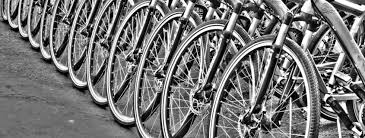 